In [10]:
"""
chapter 05
"""

# import libs 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
# import dataset 
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


Eigenvalues: [ 4.8923083   2.46635032  1.42809973  1.01233462  0.84906459  0.60181514
  0.52251546  0.08414846  0.33051429  0.29595018  0.16831254  0.21432212
  0.2399553 ]


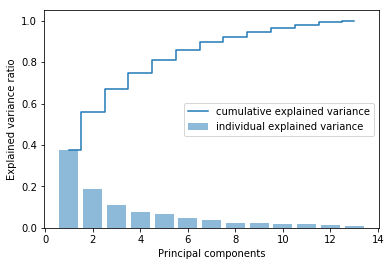

In [11]:
# ------------------ PCA --------------------------
# PCA 1: standardize the  d -dimensional dataset
sc = StandardScaler()  # need to standardize the features prior to PCA
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

# PCA 2: construct the covariance matrix
cov_mat = np.cov(X_train_std.T)

# PCA 3: decompose the covariance matrix into its eigenvectors and eigenvalues
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('Eigenvalues:', eigen_vals)  # 13 features --> 13x13 dimensional matrix 

# variance explained ratio: the fraction of an eigenvalue and the total sum of the eigenvalues 
tot = sum(eigen_vals)  # the total sum of the eigenvalues
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]  # vairance explained ratio
# cumulative sum of explained variances 
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1,14), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

# the first principal component --> 40% of the variance 
# the first two principla components --> 60% of the variance  

In [13]:
# PCA 4: select **k** eigenvectors that correspond to the **k** largest eigenvalues 
# --> **k**: the dimensionality of the new feature subspace (k<=d)  

# sort the eigenpairs by decreasing order of the eigenvalues 
eigen_pairs =[(np.abs(eigen_vals[i]),eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse=True)

# PCA 5. construct a projection matrix **w** from the top **k** eigenvectors  
# collect the two eigenvectors that correspond to the two largest values to 
# capture about 60 percent of the variance in this dataset
w= np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n',w)

Matrix W:
 [[ 0.14669811  0.50417079]
 [-0.24224554  0.24216889]
 [-0.02993442  0.28698484]
 [-0.25519002 -0.06468718]
 [ 0.12079772  0.22995385]
 [ 0.38934455  0.09363991]
 [ 0.42326486  0.01088622]
 [-0.30634956  0.01870216]
 [ 0.30572219  0.03040352]
 [-0.09869191  0.54527081]
 [ 0.30032535 -0.27924322]
 [ 0.36821154 -0.174365  ]
 [ 0.29259713  0.36315461]]


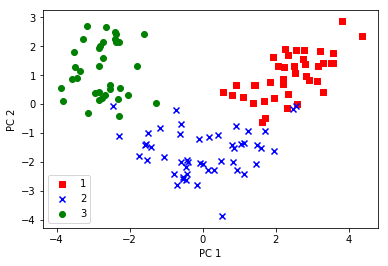

In [14]:
# PCA 6. transform the **d**-dimensional input dataset X 
# using the projection matrix **W** to obtain the new k-dimensional feature subspace  
# x' = x*W
X_train_pca = X_train_std.dot(w)

# visualize the transformed training set
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], X_train_pca[y_train==l, 1], c=c, label=l, marker=m) 
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

# the data is more spread along the x-axis—the first principal component [40%]
# than the second principal component (y-axis) [20%]